# Data Inspection

## Packages

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd
import pycountry

## Load Data

In [20]:
country_df = pd.read_pickle("../../data/generated/country_df.pkl")
comes_from_df = pd.read_pickle("../../data/generated/comes_from_df.pkl")
genre_df = pd.read_pickle("../../data/generated/genre_df.pkl")
is_of_type_df = pd.read_pickle("../../data/generated/is_of_type_df.pkl")
language_df = pd.read_pickle("../../data/generated/language_df.pkl")
spoken_languages_df = pd.read_pickle("../../data/generated/spoken_languages_df.pkl")
character_df = pd.read_pickle("../../data/generated/character_df.pkl")
actor_df = pd.read_pickle("../../data/generated/actor_df.pkl")
movie_df = pd.read_pickle("../../data/generated/movie_df.pkl")
belongs_to_df = pd.read_pickle("../../data/generated/belongs_to_df.pkl")
play_df = pd.read_pickle("../../data/generated/play_df.pkl")
appears_in_df = pd.read_pickle("../../data/generated/appears_in_df.pkl")
wikipedia_imdb_mapping_table = pd.read_pickle("../../data/generated/wikipedia_imdb_mapping_df.pkl")

## Country

Movie Distribution Among Countries

#### Bar Plot

In [164]:
country_count_df = comes_from_df.groupby("country_name").count().sort_values("movie_id",key=lambda l: -l)
country_count_df.columns = ["movie_count"]
country_log_count_df = country_count_df.apply(np.log)

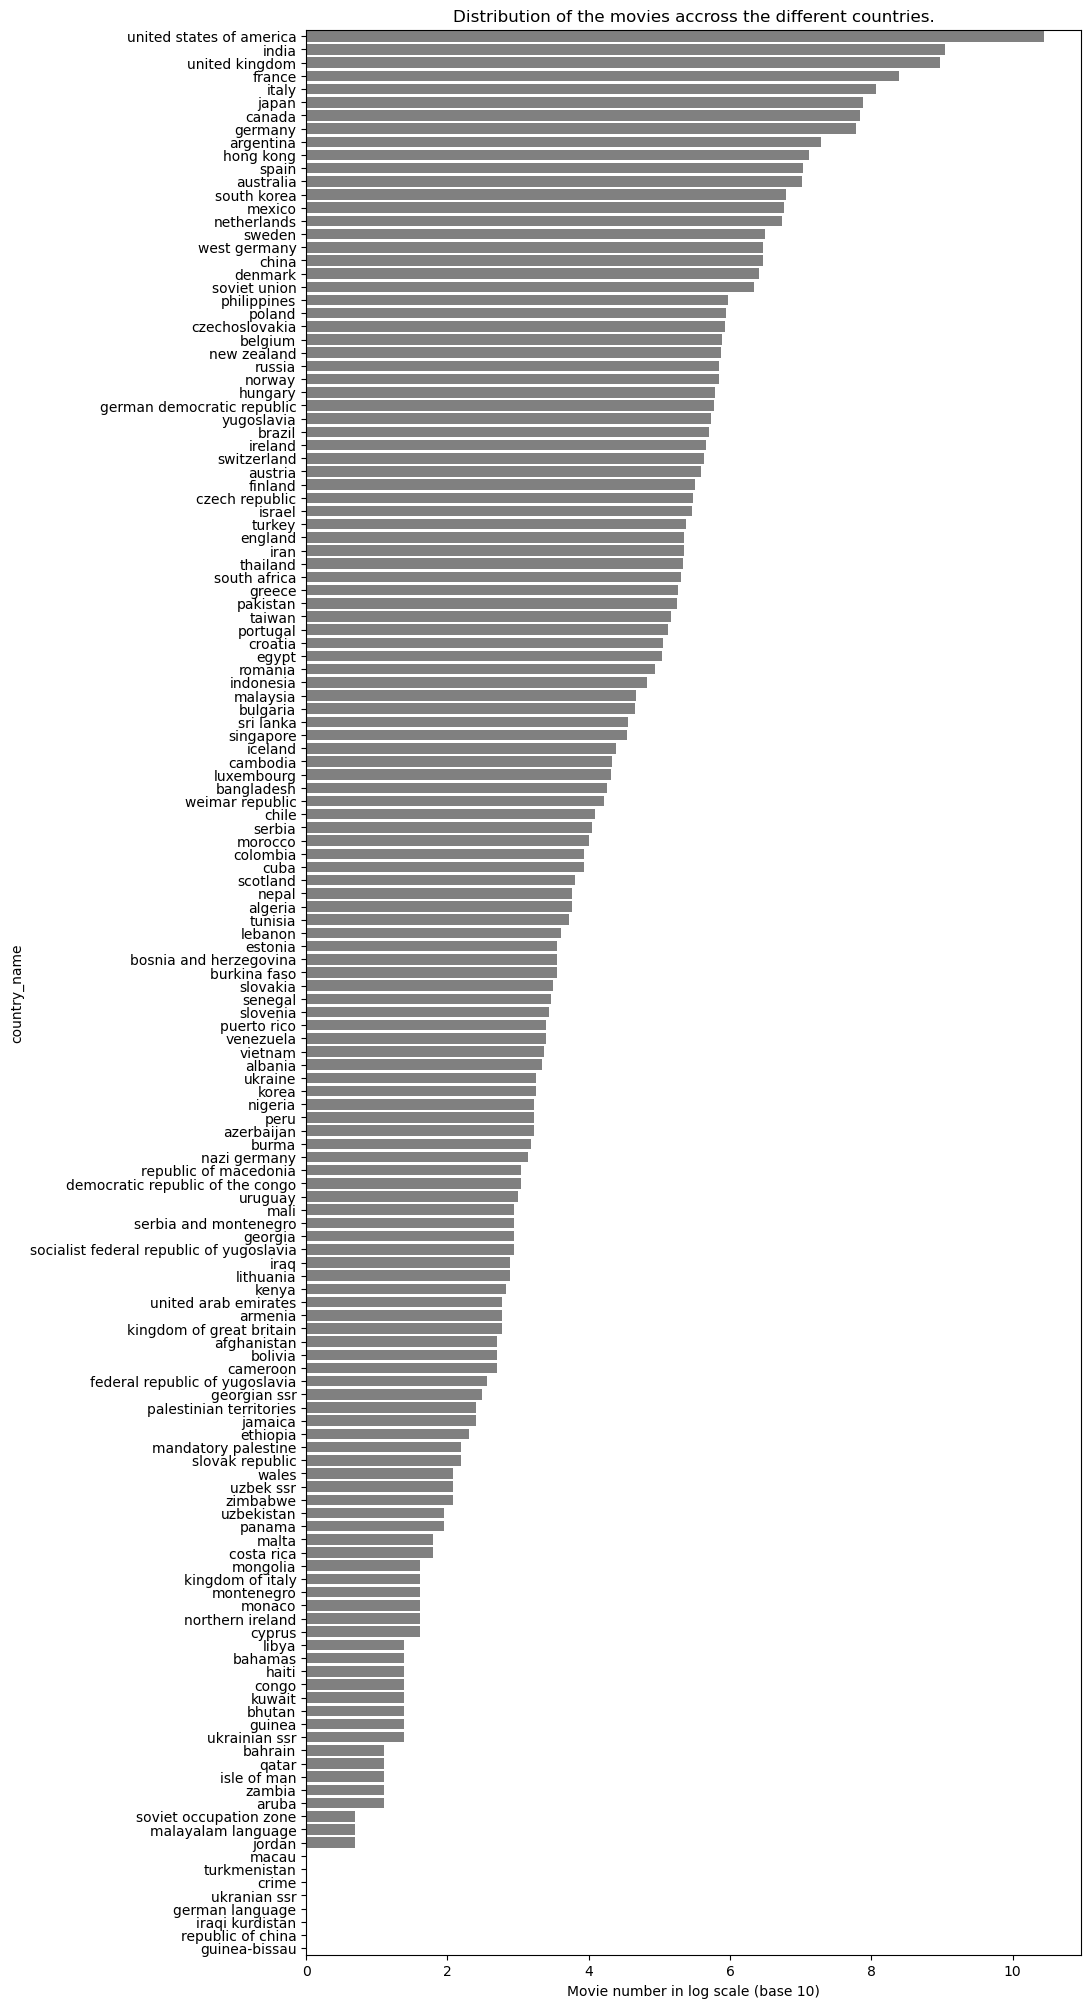

In [165]:
fig, ax = plt.subplots(1,figsize=(10,25))
ax.set_title("Distribution of the movies accross the different countries.")
sns.barplot(x=country_log_count_df.movie_count,y=country_log_count_df.index,
            orient="h",ax=ax, color="grey")#,palette=sns.color_palette("rocket",n_colors=len(a.index)));
ax.set_xlabel("Movie number in log scale (base 10)");

#### World Map 

In [166]:
CUSTOM_ALPHA3_CODE_MAPPING = {"bolivia":"BOL","burma":"BUR",
"czech republic":"CZE","czechoslovakia":"CSK",
"democratic republic of the congo":"COD","england":"GBR",
"federal republic of yugoslavia":"YUG","georgian ssr": "GEO",
"german democratic republic":"DEU","german":"DEU",
"iran":"IRN","kingdom of great britain":"GBR",
"kingdom of italy":"ITA","korea":"KOR",
"macau":"MAC","mandatory palestine":"PSE",
"nazi germany":"DEU","northern ireland":"GBR",
"palestinian territories":"PSE","republic of china":"CHN",
"republic of macedonia":"MKD","russia":"RUS",
"scotland":"GBR","serbia and montenegro":"SCG",
"slovak republic":"SVK","socialist federal republic of yugoslavia":"YUG",
"south korea":"KOR","soviet occupation zone":"RUS",
"soviet union":"RUS","taiwan":"TWN",
"ukrainian ssr":"UKR","ukranian ssr":"UKR",
"united states of america":"USA","uzbek ssr":"UZB",
"venezuela":"VEN","vietnam":"VNM",
"wales":"GBR","weimar republic":"DEU",
"west germany":"DEU","yugoslavia":"YUG",
"german language":"DEU"}

In [167]:
def alpha3code(country:str)->str:
    """
    Get the ISO_3166-1 alpha-3 code for the given country.
    
    :param country: Country name.
    
    :return: Three letters alpha-3 code, or "None" if not available.
    """
    CODE = "None"
    try:
        CODE = pycountry.countries.get(name=country).alpha_3
    except:
        if country in CUSTOM_ALPHA3_CODE_MAPPING.keys():
            CODE = CUSTOM_ALPHA3_CODE_MAPPING[country]
    return CODE

In [168]:
country_log_count_df.reset_index()

,country_name,movie_count
0,united states of america,10.446044
1,india,9.037296
2,united kingdom,8.970559
3,france,8.388223
4,italy,8.059276
...,...,...
141,ukranian ssr,0.000000
142,german language,0.000000
143,iraqi kurdistan,0.000000
144,republic of china,0.000000


In [171]:
country_code_log_count_df = country_log_count_df.reset_index()
country_code_log_count_df["CODE"] = country_code_log_count_df["country_name"].apply(alpha3code)
country_code_log_count_df = country_code_log_count_df.set_index("country_name")

In [172]:
world_countries_df = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))
world_countries_df.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world_wrong_code_ids = world_countries_df["CODE"] == "-99"
world_wrong_code = world_countries_df[world_wrong_code_ids]
world_countries_df.loc[world_wrong_code_ids,"CODE"] = world_wrong_code["name"].apply(alpha3code)
world_merge = world_countries_df.merge(country_code_log_count_df,on='CODE')
world_merge = world_merge[~(world_merge["CODE"] == "None")]

<AxesSubplot:title={'center':'World Movie repartition (log scale of movie count)'}>

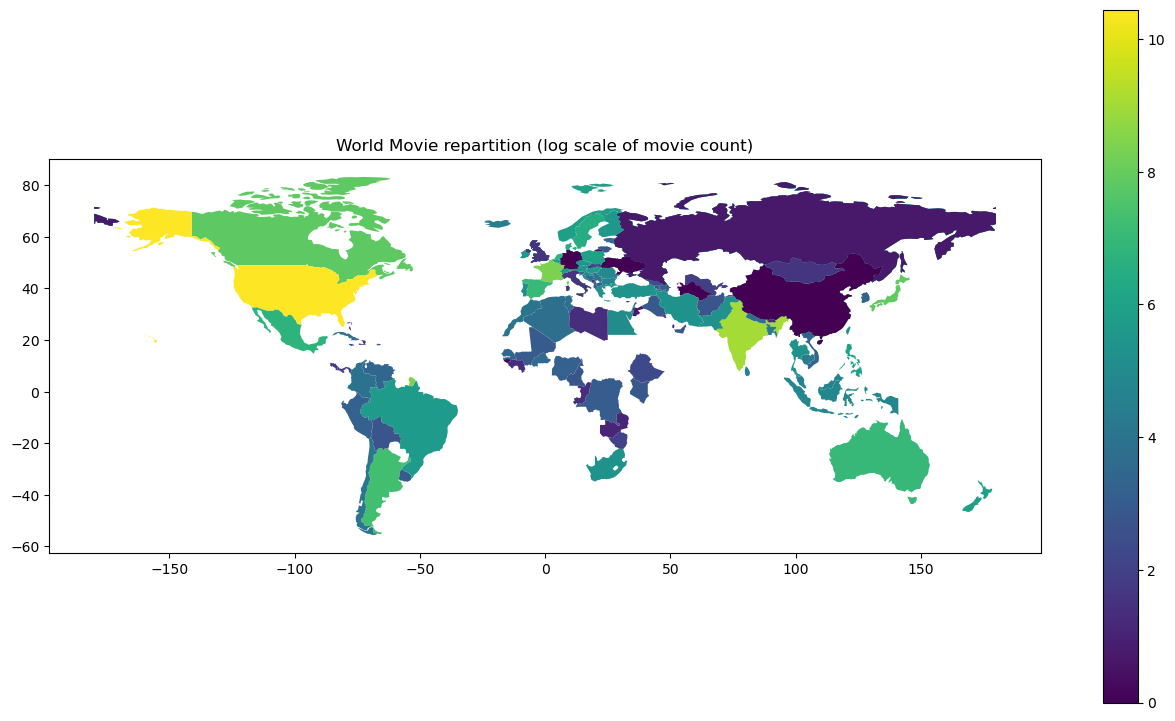

In [173]:
fig,ax = plt.subplots(1,figsize=(16,9))
ax.set_title("World Movie repartition (log scale of movie count)")
world_merge.plot(column="movie_count",legend=True,ax=ax)

### Top and bottom countries

In [203]:
print(f"The top 10 countries are {country_count_df.head(10)}\n")
print(f"The bottom 10 countries are {country_count_df.tail(10)}")

The top 10 countries are                           movie_count
country_name                         
united states of america        34408
india                            8411
united kingdom                   7868
france                           4395
italy                            3163
japan                            2647
canada                           2534
germany                          2393
argentina                        1468
hong kong                        1240

The bottom 10 countries are                     movie_count
country_name                   
malayalam language            2
jordan                        2
macau                         1
turkmenistan                  1
crime                         1
ukranian ssr                  1
german language               1
iraqi kurdistan               1
republic of china             1
guinea-bissau                 1


### Descriptive statistics
Our data has a heavy tail, with a lot of countries having only a few movies. We will thus robust statistics.

In [192]:
country_median = country_count_df.median().item()
print(f"The median number of movies per country is {country_median}.")

The median number of movies per country is 32.5.


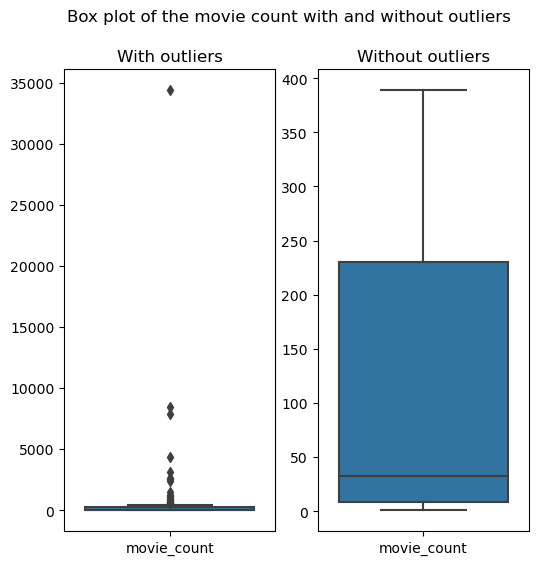

In [194]:
fig,axs = plt.subplots(1,2,figsize=(6,6))
fig.suptitle("Box plot of the movie count with and without outliers")
sns.boxplot(country_count_df,ax=axs[0])
axs[0].set_title("With outliers")
sns.boxplot(country_count_df,showfliers=False,ax=axs[1])
axs[1].set_title("Without outliers");

## Languages

<AxesSubplot:ylabel='Count'>

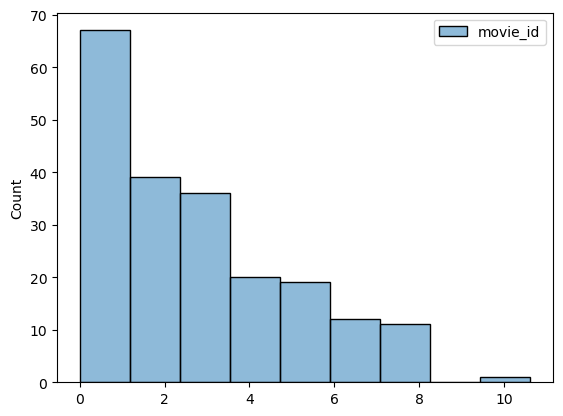

In [22]:
sns.histplot(spoken_languages_df.groupby("language_name").count().sort_values("movie_id",key=lambda l: -l).apply(np.log))